# Linear Regression

## L1 Regularization

In [1]:
import numpy as np
import pandas as pd #For easy data reading

### Sigmoid function

In [2]:
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

### Data

In [3]:
df = pd.read_csv('blood_fat.csv')
N = len(df.index)

df.head(4)

,age,weight,blood_fat
0,0.919355,0.65,0.640741
1,0.741935,0.00,0.033333
2,0.612903,0.80,0.829630
3,0.693548,0.25,0.303704


In [4]:
X = df.iloc[:,0:2].as_matrix()
y = df.iloc[:,2].as_matrix().reshape(len(df.index),1)

In [5]:
print(X.shape,':',X[1])
print(y.shape,':',y[1])

(25, 2) : [ 0.74193548  0.        ]
(25, 1) : [ 0.03333333]


### Model

In [6]:
def layer():
    l1 = sigmoid(np.dot(X,weight))
    return l1

In [7]:
def loss(predicted):
    l1_loss = y - predicted
    return l1_loss

In [8]:
def backprop_L1Regularization(l1,loss,weight,lamb=10):
    
    #L1 Regularization expression
    L1 = lamb/(2*N) + (weight/N)
    
    l1_delta = loss * sigmoid(l1,True)
    weight += L1 * np.dot(X.T,l1_delta)

    return weight

##### Initialize weight

In [9]:
weight = np.random.normal(size=(2,1),loc=0.5,scale=0.5)
weight

array([[ 0.61977488],
       [ 0.75240145]])

### Train

In [10]:
epochs = 50
loss_list = []

for step in range(epochs):
    l1_out = layer()
    _loss = loss(l1_out)
    av_loss = abs(np.average(_loss))
    loss_list.append(av_loss)
    
    weight = backprop_L1Regularization(l1_out,_loss,weight)
    

    
    print('Loss at epoch %d: %.2f' %(step,av_loss))

Loss at epoch 0: 0.20
Loss at epoch 1: 0.17
Loss at epoch 2: 0.15
Loss at epoch 3: 0.13
Loss at epoch 4: 0.11
Loss at epoch 5: 0.10
Loss at epoch 6: 0.09
Loss at epoch 7: 0.08
Loss at epoch 8: 0.07
Loss at epoch 9: 0.07
Loss at epoch 10: 0.07
Loss at epoch 11: 0.06
Loss at epoch 12: 0.06
Loss at epoch 13: 0.06
Loss at epoch 14: 0.06
Loss at epoch 15: 0.06
Loss at epoch 16: 0.06
Loss at epoch 17: 0.06
Loss at epoch 18: 0.06
Loss at epoch 19: 0.06
Loss at epoch 20: 0.05
Loss at epoch 21: 0.05
Loss at epoch 22: 0.05
Loss at epoch 23: 0.05
Loss at epoch 24: 0.05
Loss at epoch 25: 0.05
Loss at epoch 26: 0.05
Loss at epoch 27: 0.05
Loss at epoch 28: 0.05
Loss at epoch 29: 0.05
Loss at epoch 30: 0.05
Loss at epoch 31: 0.05
Loss at epoch 32: 0.05
Loss at epoch 33: 0.05
Loss at epoch 34: 0.05
Loss at epoch 35: 0.05
Loss at epoch 36: 0.05
Loss at epoch 37: 0.05
Loss at epoch 38: 0.05
Loss at epoch 39: 0.05
Loss at epoch 40: 0.05
Loss at epoch 41: 0.05
Loss at epoch 42: 0.05
Loss at epoch 43: 0.0

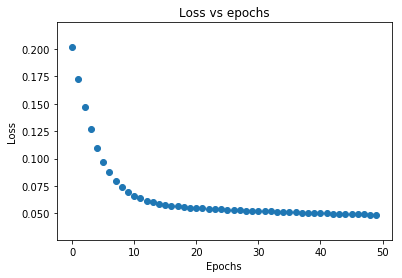

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Loss vs epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.scatter(np.arange(0,len(loss_list)),loss_list)
plt.show();